# Chapter 4 Notes
----
## Gaussian distributions
A **distribution** of data refers to the shape of the data when you graph it. 

The most common distribution is called the `Gaussian distribution`, also called the `normal distribution`.

When plotting the `Gaussian distribution`, the data is shaped like a **bell curve**.

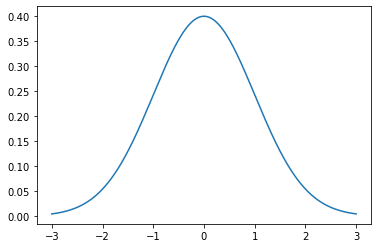

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# the x axis contains the observations
x_axis = np.arange(-3, 3, .001) # creates normally distributed values

# the y axis contains the likelihood of each observation
# pdf calculates the probability density function of the input data (more detail in chapter 10)
y_axis = norm.pdf(x_axis, 0, 1)

plt.plot(x_axis, y_axis)
plt.show()

## Sample vs Population

When doing any form of predictive modeling, it almost always likely that you will be dealing with samples from a population.

`Machine learning` uses data sample to learn from and make predictions about the population. 

**Train, dev, and test** sets are all considerd samples.

The `training` set must be representative of the population of observations so we can fit a model well.

The `testing` set must be representative of the population of observations so that we can **develop an unbased evaluation of the model skill.**

-----

In the code below, `randn()` generates a sample of floats drawn from a normal distribution with a **mean of 0** and **std of 1**

We can **scale** the mean and std by `adding the desired mean` and `multiplying by the desired std`.

In [16]:
np.random.seed(1)
data = np.random.randn(10000)
data

array([ 1.62434536, -0.61175641, -0.52817175, ..., -1.01414382,
       -0.06269623, -1.43786989])

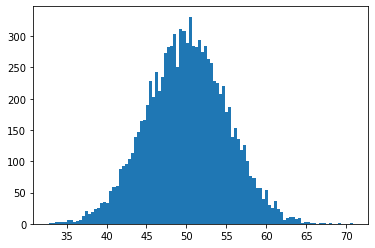

In [17]:
# std = 5, mean = 50
data = 5 * np.random.randn(10000) + 50

plt.hist(data, bins=100)
plt.show()

## Measures of Central Tendency

The `central tendency` refers to the most common value of a distribution. The most common value tend to appear **towards the middle** of the distribution.

In a **normal distribution**, the `mean` is the central tendency.

- `Mean` - **sum** of the observations **divided** by the total number of observations:

    <font size=5>  $mean(x)= \frac{\sum_{i=1}^{n}x_i}{n}$ </font>

    <font size=5> $ mean(x)= \frac{1}{n}*\sum_{i=1}^n$</font>

where $x_i$ is the $i^{th}$ observation form the dataset and $n$ is the **total number of observations**

----
Below is code demonstrating how to calculate the mean using `numpy` and base `python`

In [33]:
np.random.seed(1)
data = np.random.randn(10000)

def mymean(nums):
    n = len(nums)
    return (1/n) * sum(nums)

print(f"Numpy mean: {np.mean(data)}")
print(f"Python mean:{mymean(data)}")

Numpy mean: 0.00977265669910497
Python mean:0.009772656699104992


## Variance and standard deviation

The `variance` of a distribution refers to how far observations are from the mean:

- **Low** variance `==` values are grouped **around the mean**

- **High** variance `==` values are grouped **spread out from the mean**

<font size=4>$variance(x) = \frac{1}{n-1}*\sum_{i=1}^{n}(x_{i} - mean(x))^{2}$</font>

----

The `standard deviation (std)` is just the **square root of the variance**. We use this because variance alone can be difficult to summarize since the values are squared .



The code below shows what `high` and `low` variance data looks like, as well as how to calculate it, along with the `std`

Numpy variance: 0.9975731615516468
Python variance: 0.9976729288445387

Numpy std: 0.9987858436880485
Python std: 0.9988357867259957


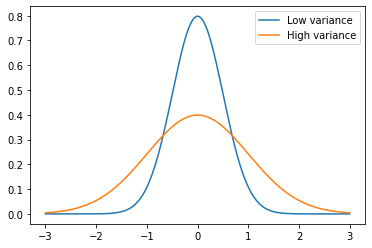

In [40]:
x_axis = np.arange(-3, 3, .001) # creates normally distributed values

def myvariance(nums):
    mean = mymean(nums)
    n = len(nums)
    return ( 1 / (n-1) ) * sum([(x - mean)**2 for x in nums])

def mystd(nums):
    from math import sqrt
    return sqrt(myvariance(nums))

print(f"Numpy variance: {np.var(data)}")
print(f"Python variance: {myvariance(data)}\n")
print(f"Numpy std: {np.std(data)}")
print(f"Python std: {mystd(data)}")




# plot low variance
plt.plot(x_axis, norm.pdf(x_axis, 0, 0.5), label="Low variance")

# plot high variance
plt.plot(x_axis, norm.pdf(x_axis, 0, 1),label="High variance")

plt.legend(loc="upper right")
plt.show()

# Extensions

In [53]:
import pandas as pd

data = pd.read_csv("iris.data")

def summarize(colname):
    d = data[colname]
    print(f"""
    ------------------
Summary stats for {colname}:
    ------------------
Mean:{np.mean(d)}\nVariance:{np.var(d)}\nStd:{np.std(d)}""")
    
summarize("sepal_length")

summarize("sepal_width")


    ------------------
Summary stats for sepal_length:
    ------------------
Mean:5.843333333333335
Variance:0.6811222222222222
Std:0.8253012917851409

    ------------------
Summary stats for sepal_width:
    ------------------
Mean:3.0540000000000007
Variance:0.1867506666666667
Std:0.4321465800705435
